# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 8 de mayo de 2023__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 1234

# Apartado 1: Análisis de sentimientos


__Número de grupo: 20__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Juan Pablo Corella Martín__

## 1) Carga del conjunto de datos

El fichero `IMBD_Dataset.csv` contiene opiniones de películas clasificadas en 2 categorías diferentes (positiva/negativa).

Este set de datos se creó utilizando el "IMDB Dataset of 50K Movie Reviews", el cual contiene 50,000 reseñas de películas con un sentimiento positivo o negativo adjunto a ellas.

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. Comprueba que la distribución de los ejemplos en las clases es la misma en entrenamiento y test. 

----

# TODO: Comentar cosas y mostrar ejemplos

In [2]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np


In [4]:
# imbd_file = '/content/drive/MyDrive/IA2/p3/IMDB_Dataset.csv'

# df=pd.read_csv(imbd_file)
# df.head()

In [5]:
imbd_file = './IMDB_Dataset.csv'

df = pd.read_csv(imbd_file)
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 2) Estudio del efecto de distintas representaciones y distintos algoritmos para resolver la tarea

Construye distintas representaciones vectoriales basadas en lo contado en las clases de teoría (bolsas de palabras con 2 configuraciones distintas significativas) y utilízalas con 2 de los algoritmos estudiados (árboles de decisión y naive bayes)

Para una única configuración, muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?


------

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
from os import path, getcwd

nltk_path = path.join(getcwd(), 'data')
nltk.data.path.append(nltk_path)
nltk.download('stopwords', nltk_path)

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/_alk/Documentos/IA2/labs/lab3/data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df_original = df.copy(deep=True)


In [9]:
from sklearn.model_selection import train_test_split

df.review = normalize_corpus(df.review)
train_data, test_data = train_test_split(df, test_size=0.2,random_state=RANDOM_STATE)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
# Tomamos los textos del conjunto de entrenamiento y los transformamos en 
# una matriz de datos (palabras) según el diccionario estándar
train_vector_data=vectorizer.fit_transform(train_data.review)
feature_names = vectorizer.get_feature_names_out()

print(len(feature_names))


154794


In [11]:
print(feature_names[:100])
print(feature_names[-100:])

['00' '02' '03' '10' '100' '11' '12' '13' '14' '14th' '15' '150'
 '150_worst_cases_of_nepotism' '16' '17' '18' '1850' '1887' '1888' '1890'
 '19' '1915' '1920' '1922' '1923' '1933' '1942' '1945' '1949' '1950'
 '1955' '1958' '1968' '1970' '1970s' '1971' '1974' '1975' '1976' '1977'
 '1978' '1980' '1987' '1988' '1990' '1991' '1992' '1996' '1997' '1999'
 '19th' '1s' '1st' '20' '2002' '2004' '2005' '2008' '2009' '2012' '2040'
 '20th' '21849889' '21849890' '21st' '25' '26' '27' '28' '2nd' '2s' '2x'
 '30' '30s' '320x180' '35' '35yr' '3d' '3rd' '40' '400' '40s' '44yrs' '45'
 '45ish' '50' '52' '54' '5th' '60' '60s' '70' '700' '70s' '72' '75' '78'
 '7th' '80' '90']
['zorros' 'zorrostyle' 'zors' 'zosch' 'zoschs' 'zosh' 'zoundsbr' 'zouzou'
 'zoweebr' 'zozo' 'zp' 'zplan' 'zrated' 'zs' 'zsazsa' 'zschering'
 'zseries' 'zshops' 'zshornack' 'zsigmond' 'zsrr' 'zsrs' 'zu' 'zubeidaa'
 'zuber' 'zubr' 'zucchiniheaded' 'zucco' 'zuccoleaves' 'zuccon'
 'zuccopreparing' 'zuccos' 'zucker' 'zuckerabrams' 'zuckerma

In [12]:
#* Mucho ruido, vamos a usar nuestro vocabulario
with open('./words.txt') as f:
    dictionary = f.read().splitlines()

# El diccionario cargado lo pasamos en el parámetro vocabulary
vectorizer = CountVectorizer(vocabulary=dictionary, lowercase=True, stop_words='english')
train_vector_data=vectorizer.fit_transform(train_data.review)
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:100])

/usr/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


['2' '1080' '&c' '10-point' '10th' '11-point' '12-point' '16-point'
 '18-point' '1st' '2,4,5-t' '2,4-d' '20-point' '2D' '2nd' '30-30' '3D'
 '3-D' '3M' '3rd' '48-point' '4-D' '4GL' '4H' '4th' '5-point' '5-T' '5th'
 '6-point' '6th' '7-point' '7th' '8-point' '8th' '9-point' '9th' 'a' "a'"
 'a-' 'A&M' 'A&P' 'A.' 'A.A.A.' 'A.B.' 'A.B.A.' 'A.C.' 'A.D.' 'A.D.C.'
 'A.F.' 'A.F.A.M.' 'A.G.' 'A.H.' 'A.I.' 'A.I.A.' 'A.I.D.' 'A.L.' 'A.L.P.'
 'A.M.' 'A.M.A.' 'A.M.D.G.' 'A.N.' 'a.p.' 'a.r.' 'A.R.C.S.' 'A.U.'
 'A.U.C.' 'A.V.' 'a.w.' 'A.W.O.L.' 'A/C' 'A/F' 'A/O' 'A/P' 'A/V' 'A1'
 'A-1' 'A4' 'A5' 'AA' 'AAA' 'AAAA' 'AAAAAA' 'AAAL' 'AAAS' 'Aaberg'
 'Aachen' 'AAE' 'AAEE' 'AAF' 'AAG' 'aah' 'aahed' 'aahing' 'aahs' 'AAII'
 'aal' 'Aalborg' 'Aalesund' 'aalii' 'aaliis']


In [13]:
print(feature_names[-100:])

['Zsigmondy' 'Zsolway' 'ZST' 'ZT' 'Ztopek' 'Zubeneschamali' 'Zubird'
 'Zubkoff' 'zubr' 'Zuccari' 'zuccarino' 'Zuccaro' 'Zucchero' 'zucchetti'
 'zucchetto' 'zucchettos' 'zucchini' 'zucchinis' 'zucco' 'zuchetto'
 'Zucker' 'Zuckerman' 'zudda' 'zuffolo' 'zufolo' 'Zug' 'zugtierlast'
 'zugtierlaster' 'zugzwang' 'Zui' 'Zuian' 'Zuidholland' 'zuisin' 'Zulch'
 'Zuleika' 'Zulema' 'Zulhijjah' 'Zulinde' 'Zulkadah' "Zu'lkadah"
 'Zullinger' 'Zullo' 'Zuloaga' 'Zulu' 'Zuludom' 'Zuluize' 'Zulu-kaffir'
 'Zululand' 'Zulus' 'zumatic' 'zumbooruk' 'Zumbrota' 'Zumstein' 'Zumwalt'
 'Zungaria' 'Zuni' 'Zunian' 'zunyite' 'zunis' 'zupanate' 'Zupus' 'Zurbar'
 'Zurbaran' 'Zurek' 'Zurheide' 'Zurich' 'Zurkow' 'zurlite' 'Zurn' 'Zurvan'
 'Zusman' 'Zutugil' 'zuurveldt' 'zuza' 'Zuzana' 'Zu-zu' 'zwanziger'
 'Zwart' 'ZWEI' 'Zweig' 'Zwick' 'Zwickau' 'Zwicky' 'Zwieback' 'zwiebacks'
 'Zwiebel' 'zwieselite' 'Zwingle' 'Zwingli' 'Zwinglian' 'Zwinglianism'
 'Zwinglianist' 'zwitter' 'zwitterion' 'zwitterionic' 'Zwolle' 'Zworykin'
 

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculamos el valor TF-IDF 

tfidfer = TfidfTransformer()
train_preprocessed = tfidfer.fit_transform(train_vector_data)

print(train_preprocessed[10])

  (0, 461456)	0.12579327195123483
  (0, 454391)	0.11654297540482404
  (0, 453100)	0.1495545210419253
  (0, 445295)	0.09268354866400144
  (0, 445293)	0.09475761101154959
  (0, 426779)	0.1608778895495493
  (0, 423590)	0.1608778895495493
  (0, 422359)	0.21746189786580866
  (0, 394746)	0.07214431807474121
  (0, 383473)	0.16688079779319984
  (0, 374782)	0.11901079647355263
  (0, 342778)	0.09206920838064399
  (0, 342771)	0.07156688015720021
  (0, 341007)	0.06925475631966892
  (0, 323928)	0.10152542915658123
  (0, 323795)	0.10164086656900866
  (0, 317643)	0.11383341421971684
  (0, 309133)	0.09626776607595595
  (0, 299724)	0.07699852501227651
  (0, 299619)	0.08270757288905833
  (0, 289704)	0.051560922570476064
  (0, 285822)	0.10662618048602177
  (0, 254206)	0.15952308533682372
  (0, 252607)	0.1502236279159648
  (0, 246767)	0.032235194819850516
  :	:
  (0, 146633)	0.1023708912286036
  (0, 145031)	0.14143745344924072
  (0, 143770)	0.10010057023782518
  (0, 138922)	0.03439176312814564
  (0, 13791

In [15]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [16]:
write_terms(feature_names, None, train_vector_data, 1000)

Mensaje 1000 vectorizado: ['actors' 'amateur' 'attacked' 'babes' 'bad' 'classified' 'considering'
 'dead' 'film' 'flick' 'genre' 'interesting' 'living' 'make' 'mistake'
 'presented' 'project' 'real' 'really' 'shooting' 'shots' 'sight'
 'staying' 'sure' 'thought' 'titling' 'twist' 'used' 'violence' 'women'
 'zombie'] 



In [17]:

# Tomamos los textos del conjunto de test y los transformamos en una matriz
# de palabras. Al usar "transform" toma como referencia únicamente las palabras
# encontradas en el conjunto de entrenamiento
test_vector_data=vectorizer.transform(test_data.review)
# Calculamos el valor TF-IDF 
# Al usar "transform" toma como IDF el del conjunto de entrenamiento 
test_preprocessed=tfidfer.transform(test_vector_data)

ENTRENAMOS LOS MODELOS

a.1) Árbol de decisión con TF-IDF

In [18]:
from sklearn import tree
import numpy as np

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(train_preprocessed, train_data.sentiment)

tree_train_predictions = tree_classifier.predict(train_preprocessed)
tree_test_predictions = tree_classifier.predict(test_preprocessed)
print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_data.sentiment))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_data.sentiment))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.7218


In [19]:
test_data["sentiment"].value_counts()

positive    5012
negative    4988
Name: sentiment, dtype: int64

              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      4988
    positive       0.72      0.72      0.72      5012

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

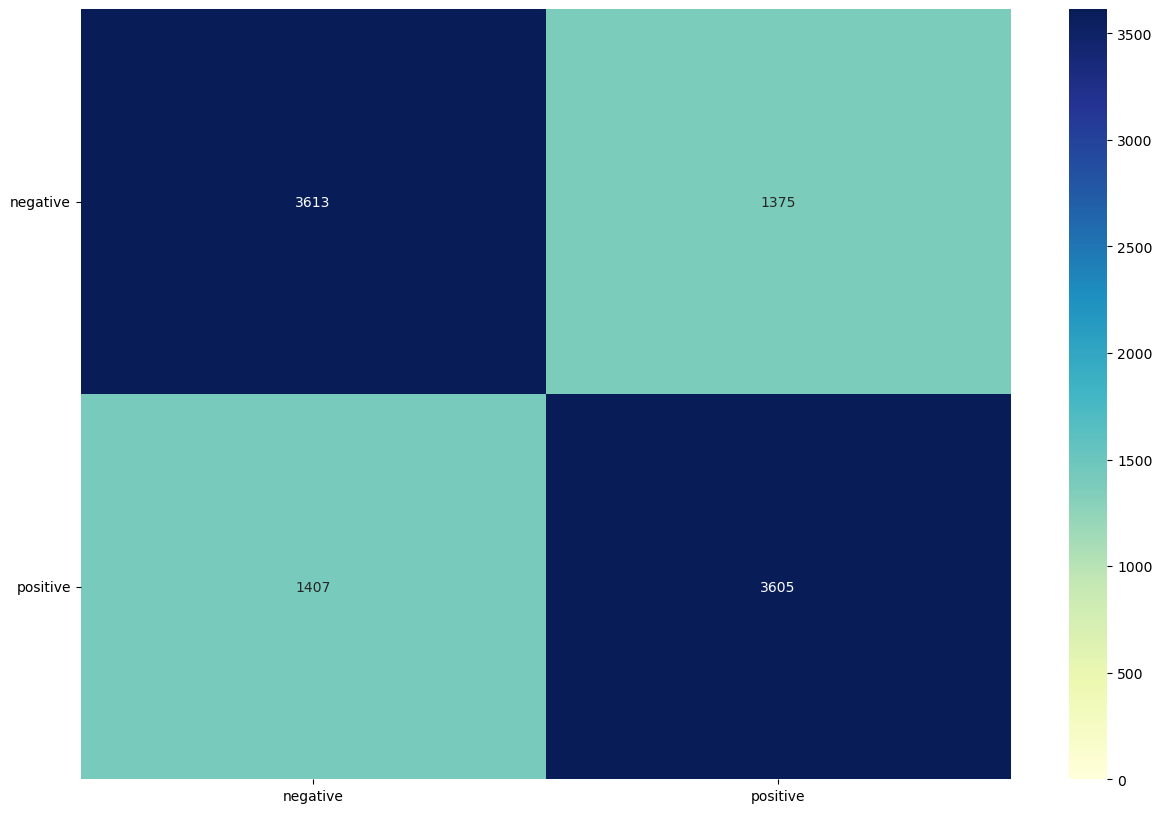

In [20]:
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = tree_test_predictions

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------



# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


a.2) Árbol de decisión con CountVectorizer

In [21]:
# Creamos el clasificador con los valores por defecto
tree_classifier1 = tree.DecisionTreeClassifier()
tree_classifier1.fit(train_vector_data, train_data.sentiment)

tree_train_predictions1 = tree_classifier1.predict(train_vector_data)
tree_test_predictions1 = tree_classifier1.predict(test_vector_data)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions1 == train_data.sentiment))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions1 == test_data.sentiment))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.73


              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      4988
    positive       0.73      0.73      0.73      5012

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

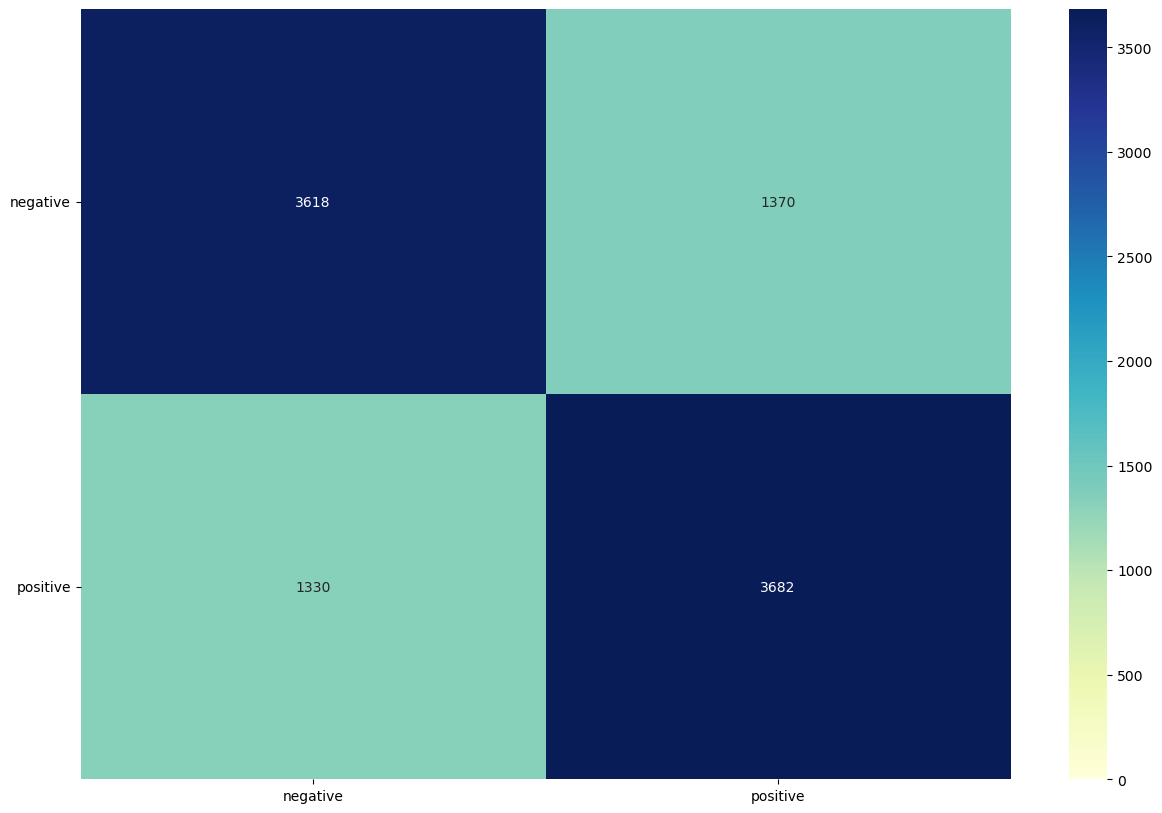

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = tree_test_predictions1

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


b.1) Naive Bayes con TF_IDF

In [23]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, train_data.sentiment)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == train_data.sentiment))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == test_data.sentiment))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.8944
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.8565


              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      4988
    positive       0.87      0.84      0.85      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

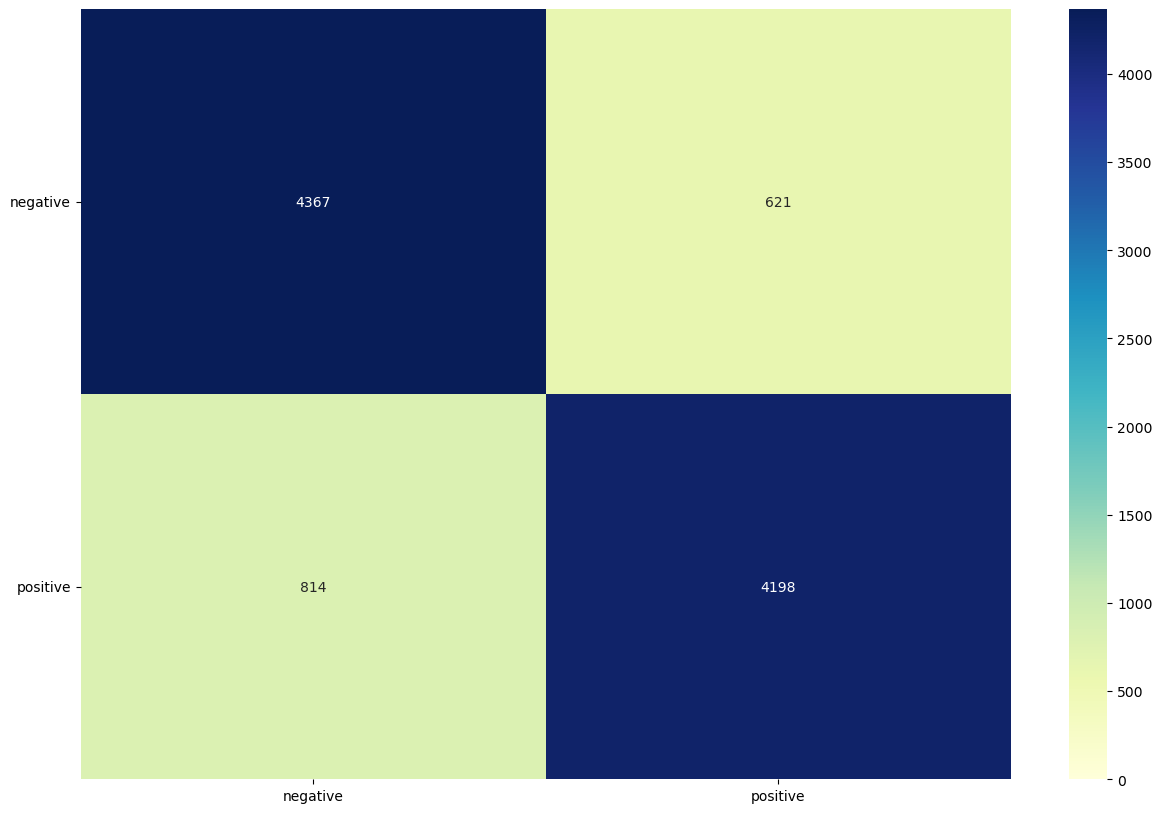

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = mnb_test_predictions

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


b.2) Naive Bayes con Count-Vectorizer

In [25]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier1 = MultinomialNB()

mnb_classifier1.fit(train_vector_data, train_data.sentiment)

mnb_train_predictions1 = mnb_classifier1.predict(train_vector_data)
mnb_test_predictions1 = mnb_classifier1.predict(test_vector_data)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions1 == train_data.sentiment))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions1 == test_data.sentiment))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.882175
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.8413


              precision    recall  f1-score   support

    negative       0.82      0.87      0.85      4988
    positive       0.86      0.82      0.84      5012

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



(array([0.5, 1.5]), [Text(0.5, 0, 'negative'), Text(1.5, 0, 'positive')])

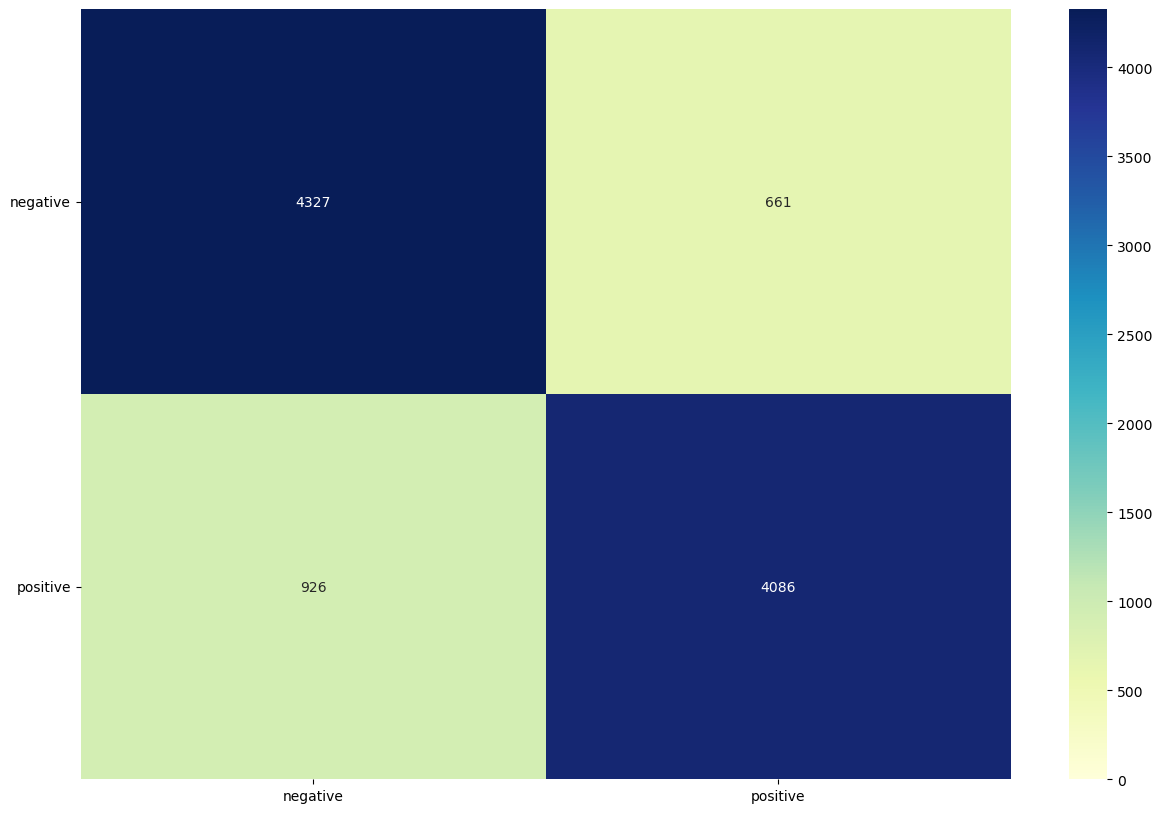

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
#En el output de esta celda se puede ver que las cantidades en support cuadran en categoría con las de arriba.

target_names = list(test_data["sentiment"].unique())

# creamos una variable auxiliar para las predicciones
predictions = mnb_test_predictions1

print(classification_report(
    test_data['sentiment'], predictions, target_names=target_names))

# Dibuja la matriz de confusión.
# Analiza los resultados obtenidos.
#------------------------------------------------------------------------------


# creamos la matriz de confusion
conf_matrix = confusion_matrix(test_data['sentiment'], predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names,
                              columns=target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0,
           vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=0)


Comparamos un mensaje original con su forma vectorizada:

In [27]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [28]:
write_terms(feature_names, None, train_vector_data, 0)

print("Mensaje original: " + list(df_original["review"])[0])


Mensaje 0 vectorizado: ['alive' 'calm' 'comedian' 'comics' 'comparison' 'crazy' 'didnt' 'drive'
 'extreme' 'floor' 'funnier' 'hard' 'higher' 'yell' 'yelling' 'joke'
 'jokes' 'laugh' 'like' 'liked' 'maybe' 'make' 'mental' 'people' 'pieces'
 'quite' 'rating' 'really' 'rolling' 'said' 'spilling' 'sure' 'tries'
 'understand' 'wants' 'water'] 

Mensaje original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section 

Podemos observar que se eliminan palabras que no aportan nada al sentimiento de la review, como preposiciones, pronombres, formas verbales de ser/estar. Nuestro normalizador no limpia las tags de html, por lo tanto se pueden encontrar palabras como "punchlinesbr"

## 3) Análisis comparativo final

Se han entrenado varios clasificadores usando vectorizaciones diferentes de los datos. Compara las diferencias entre representaciones para un mismo algoritmo y entre algoritmos. Explica a qué crees que se deben las diferencias.

Analiza con detalle el mejor clasificador de cada tipo. Indica las palabras más relevantes. Busca un ejemplo mal clasificado de cada clase, justifica el error ¿se te ocurre alguna forma de solucionarlo?


------

Añadimos los resultados de los test al df para poder comparar facilmente los resultados obtenidos sobre sentimientos.

In [29]:
test_data["tree-tfidf"] = tree_test_predictions
test_data["tree-count"] = tree_test_predictions1
test_data["nb-tfidf"] = mnb_test_predictions
test_data["nb-count"] = mnb_test_predictions1

test_data.head()

,review,sentiment,tree-tfidf,tree-count,nb-tfidf,nb-count
20308,although film made dogme emerged predominant m...,negative,positive,positive,positive,positive
37706,grandmother took sister see movie came theater...,negative,positive,positive,negative,negative
6041,possibly worst film within genre existence ann...,negative,negative,negative,negative,negative
42143,long keep mind production movie copyright ploy...,negative,negative,negative,negative,negative
23202,plot petites coupures certainly left viewer du...,negative,negative,positive,negative,negative


En el primer ejemplo podemos ver un fallo en la clasificación por parte de los cuatro clasificadores. También podemos ver que los clasificadores nb tienden a acertar más que los de árbol.

In [30]:
def print_top30_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 30 features per class\n")
    for i, class_label in enumerate(class_labels):
        top30 = np.argsort(clf.feature_log_prob_[i])[-30:]
        reversed_top = top30[::-1]

        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)), '\n')

        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')


Comprobamos en ambos casos los resultados con Naive Bayes ya que el árbol de decisión ofrece peores resultados con ambos vectorizadores.

In [31]:
print("Clasificador Naive Bayes con TF-IDF:\n")
print_top30_features_per_class_in_NB(vectorizer ,mnb_classifier1,target_names)  

Clasificador Naive Bayes con TF-IDF:

Top 30 features per class

negative: movie / film / like / bad / really / dont / people / make / movies / acting / plot / characters / way / watch / think / films / know / better / character / thing / scene / didnt / scenes / end / watching / doesnt / actually / actors / worst / look 

positive: film / movie / like / really / people / films / way / characters / think / movies / dont / character / watch / make / know / years / end / scene / real / scenes / makes / acting / better / plot / world / quite / cast / funny / actors / watching 



In [32]:
print("Clasificador Naive Bayes con CountVectorizer:\n")
print_top30_features_per_class_in_NB(vectorizer ,mnb_classifier,target_names)  

Clasificador Naive Bayes con CountVectorizer:

Top 30 features per class

negative: movie / film / bad / like / really / dont / movies / acting / make / plot / people / watch / worst / better / think / characters / way / know / films / didnt / watching / thing / character / actors / scenes / funny / actually / end / scene / minutes 

positive: movie / film / like / really / people / films / movies / think / watch / way / characters / dont / character / know / years / make / funny / excellent / real / end / acting / makes / series / better / scenes / cast / scene / music / world / actors 



Podemos ver que el clasificador de tfidf en nb clasifica "funny" como algo malo, mientras que con CountVectorizer lo clasifica como algo positivo. Errores de clasificación como este pueden llevar a que una review sea calificada de forma errónea por parte de los clasificadores.

In [33]:
df_original["review"][23202]


"The plot in Petites Coupures certainly left this viewer dumbfounded.<br /><br />***spoiler***<br /><br />In the space of 48hrs or so, Auteuil's character has an affair with a teenager, loses his wife's affections, attempts to seduce Scott Thomas, is rejected by her goes on to grope yet another female character in the back of a car and then is finally shot for his trouble.<br /><br />***end of spoiler***<br /><br />wha ???<br /><br />The only saving grace in this flick is Kristin Scott Thomas. Similar to Charlotte Rampling, she seems a *natural* to star in French cinema. My hope is that one day François Ozon may cast her in a part where she can show her true talent.<br /><br />There are some fine French films such as the remarkable Le Colonel Chabert begging for a DVD release, yet this is the tripe that gets chosen.<br /><br />Avoid this one.<br /><br />zzzz.."

Podemos ver que esta review habla negativamente de la película, pero positivamente de la actriz. Esto puede haber generado confusión en los entrenamientos.